<a href="https://colab.research.google.com/github/manishgit8834/Airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [105]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read csv file
airbnb_df=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')


In [5]:
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
airbnb_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [13]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [42]:
airbnb_df.dtypes.reset_index().rename(columns={'index':'columns',0:'dtypes'})

columns   dtypes
0                               id    int64
1                             name   object
2                          host_id    int64
3                        host_name   object
4              neighbourhood_group   object
5                    neighbourhood   object
6                         latitude  float64
7                        longitude  float64
8                        room_type   object
9                            price    int64
10                  minimum_nights    int64
11               number_of_reviews    int64
12                     last_review   object
13               reviews_per_month  float64
14  calculated_host_listings_count    int64
15                availability_365    int64

In [53]:
#check all null values in the columns
for column in airbnb_df.columns:
  print(f'percentage of null values in {column} is:{np.round(airbnb_df[column].isnull().mean()*100,2)}%')
 

percentage of null values in id is:0.0%
percentage of null values in name is:0.03%
percentage of null values in host_id is:0.0%
percentage of null values in host_name is:0.04%
percentage of null values in neighbourhood_group is:0.0%
percentage of null values in neighbourhood is:0.0%
percentage of null values in latitude is:0.0%
percentage of null values in longitude is:0.0%
percentage of null values in room_type is:0.0%
percentage of null values in price is:0.0%
percentage of null values in minimum_nights is:0.0%
percentage of null values in number_of_reviews is:0.0%
percentage of null values in last_review is:20.56%
percentage of null values in reviews_per_month is:20.56%
percentage of null values in calculated_host_listings_count is:0.0%
percentage of null values in availability_365 is:0.0%


In [68]:
#finding nan values
id_for_nan_host_name = []
for val in airbnb_df.loc[airbnb_df.host_name.isna()]['host_id']:
  id_for_nan_host_name.append(val)

In [59]:

def name_finder(id,name,id_list):
  '''This function checks if the id for name with nan value has any repeatation in other part of the the name column
    with some legitimate names. '''

  for i in range(airbnb_df.shape[0]):
    if id[i] in id_list:
      if name[i] != np.nan:
        print(name[i])
      else:
        pass

In [60]:
name_finder(airbnb_df.id,airbnb_df.name,id_for_nan_host_name)

In [61]:
#nan values from name and host
airbnb_df[['name','host_name']] = airbnb_df[['name','host_name']].fillna('no name')

In [67]:
#converting the time string into dt formate
airbnb_df['last_review']=pd.to_datetime(airbnb_df['last_review'])

In [74]:
#Splitting the dataset into reviewed for non null review data
reviews_df = airbnb_df.loc[~airbnb_df.last_review.isna() & ~airbnb_df.reviews_per_month.isna()]
reviews_df.reset_index().drop('index',axis=1,inplace=True)


In [75]:
non_reviews_df = airbnb_df.loc[airbnb_df.last_review.isna() & airbnb_df.reviews_per_month.isna()]
non_reviews_df.reset_index().drop('index',axis=1,inplace=True)

In [79]:
reviews_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129

In [80]:
non_reviews_df.head()

id                                               name  host_id  \
2    3647                THE VILLAGE OF HARLEM....NEW YORK !     4632   
19   7750                  Huge 2 BR Upper East  Cental Park    17985   
26   8700  Magnifique Suite au N de Manhattan - vue Cloitres    26394   
36  11452                        Clean and Quiet in Brooklyn     7355   
38  11943                          Country space in the city    45445   

          host_name neighbourhood_group       neighbourhood  latitude  \
2         Elisabeth           Manhattan              Harlem  40.80902   
19             Sing           Manhattan         East Harlem  40.79685   
26  Claude & Sophie           Manhattan              Inwood  40.86754   
36               Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38          Harriet            Brooklyn            Flatbush  40.63702   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
2   -73.94190     Private room    150               3                  0   
19  -73.94872  Entire home/apt    190               7                  0   
26  -73.92639     Private room     80               4                  0   
36  -73.94312     Private room     35              60                  0   
38  -73.96327     Private room    150               1                  0   

   last_review  reviews_per_month  calculated_host_listings_count  \
2          NaT                NaN                               1   
19         NaT                NaN                               2   
26         NaT                NaN                               1   
36         NaT                NaN                               1   
38         NaT                NaN                               1   

    availability_365  
2                365  
19               249  
26                 0  
36               365  
38               365

In [81]:
airbnb_df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [89]:
airbnb_df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_count','availability_365']]

latitude  longitude  price  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237    149               1                  9   
1      40.75362  -73.98377    225               1                 45   
2      40.80902  -73.94190    150               3                  0   
3      40.68514  -73.95976     89               1                270   
4      40.79851  -73.94399     80              10                  9   
...         ...        ...    ...             ...                ...   
48890  40.67853  -73.94995     70               2                  0   
48891  40.70184  -73.93317     40               4                  0   
48892  40.81475  -73.94867    115              10                  0   
48893  40.75751  -73.99112     55               1                  0   
48894  40.76404  -73.98933     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                    NaN                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890                NaN                               2                 9  
48891                NaN                               2                36  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23  

[48895 rows x 8 columns]

In [90]:
numeric_columns = [col for col in airbnb_df.columns if airbnb_df[col].dtype !='O' and airbnb_df[col].dtype !='datetime64[ns]']
required_numeric_col = [col for col in numeric_columns if col not in ['id','host_id','latitude','longitude']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

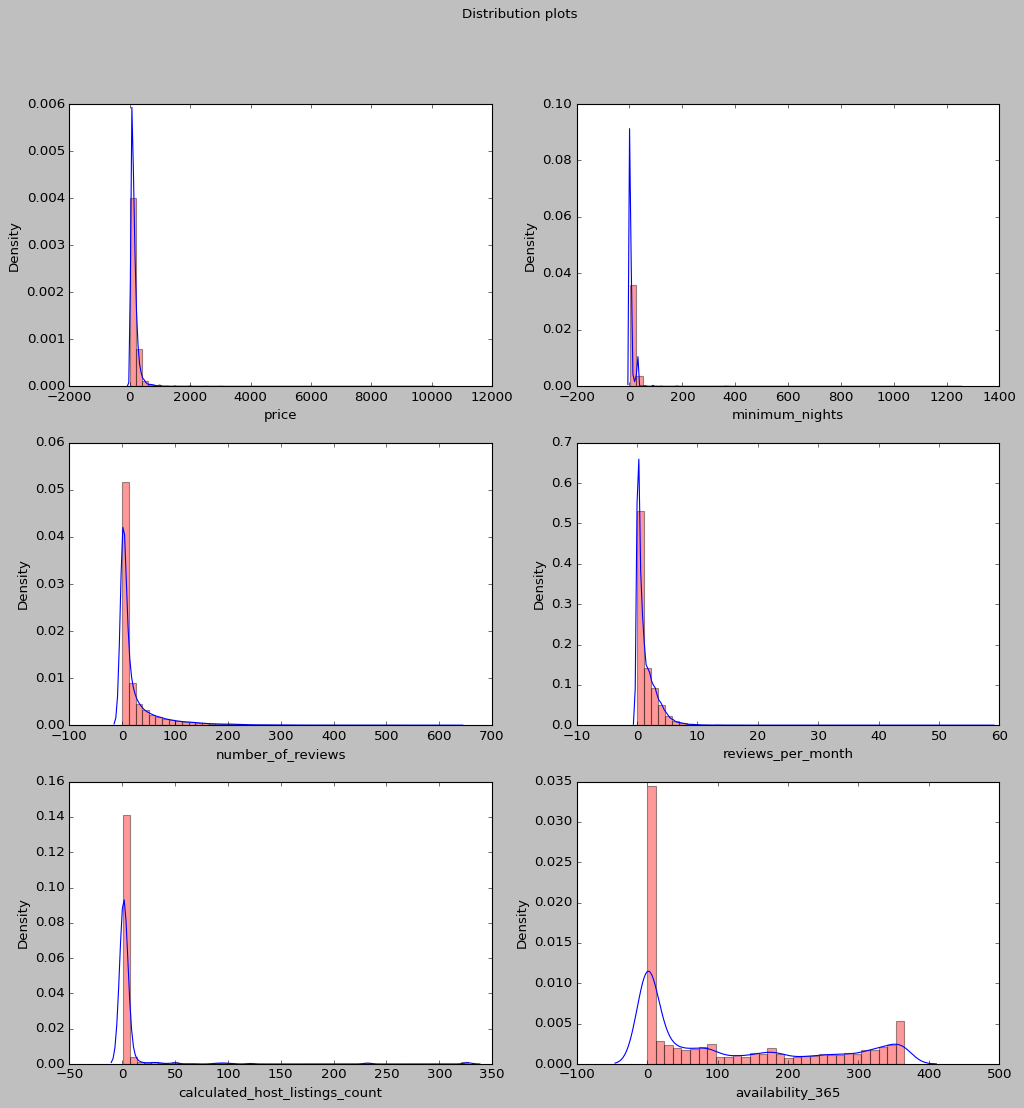

In [97]:
plt.style.use('classic')
fig,ax = plt.subplots(3,2,figsize=(15,15))
fig.suptitle('Distribution plots')
row=0
cols=0
for col in required_numeric_col:
  if row<3:
    sns.distplot(airbnb_df[col],ax=ax[row][cols],color='red',kde_kws={'color':'blue'}) 
    if cols>=1:
      row+=1
      cols=0
    else:cols+=1
fig.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


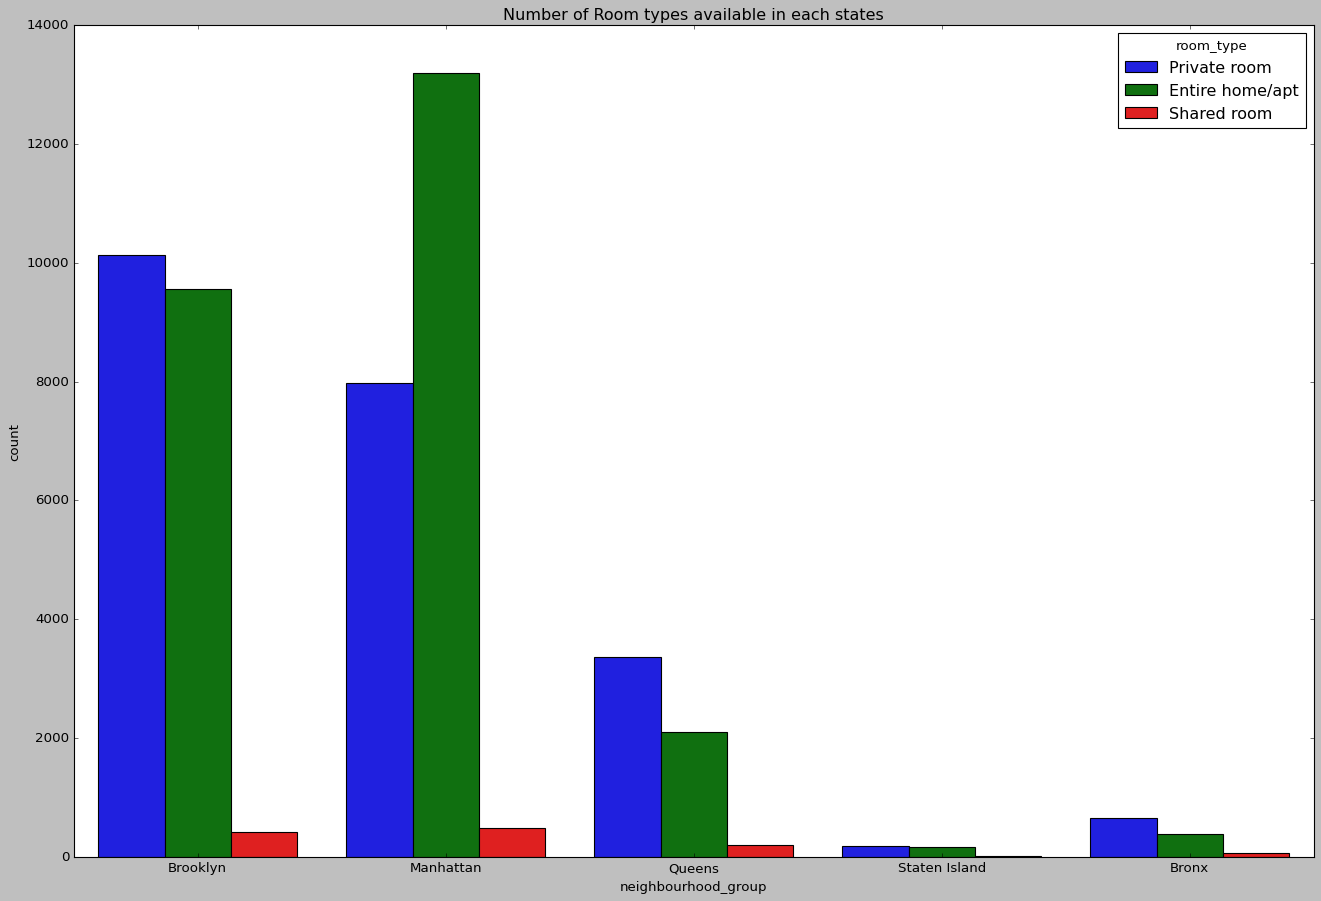

In [103]:
plt.style.use('classic')
plt.figure(figsize=(20,13))
sns.countplot(airbnb_df['neighbourhood_group'],hue=airbnb_df['room_type'])
plt.title('Number of Room types available in each states')
plt.show()

In [106]:
# Mapping of the neighbourhood with respect to their price
ax = px.scatter_mapbox(reviews_df,lat='latitude',lon='longitude',color='neighbourhood_group',size='price',color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                       hover_data=['name','neighbourhood_group','neighbourhood','price'],mapbox_style="carto-positron")
ax.show()

In [107]:
import plotly.express as px

In [108]:
ax = px.scatter_mapbox(reviews_df,lat='latitude',lon='longitude',color='neighbourhood_group',size='price',color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                       hover_data=['name','neighbourhood_group','neighbourhood','price'],mapbox_style="carto-positron")
ax.show()

In [110]:
neighbourhood_groups = [states for states in reviews_df['neighbourhood_group'].unique()]  # List to grab states present in the dataset.

for states in neighbourhood_groups:
  temporary_df = reviews_df.loc[reviews_df.neighbourhood_group==states,['host_id','host_name','number_of_reviews','reviews_per_month']].groupby(['host_id','host_name']).sum()['reviews_per_month'].sort_values(ascending=False)[:10].reset_index()
  ax = px.bar(temporary_df,x='host_name',y='reviews_per_month',
            labels={'host_name':'Host Name','reviews_per_month':'Reviews per Month'},
            title = f'<b>Top 10 Busiest Host in the </b> <b><i>{states.upper()}</i></b>',
            width = 800, height=500,
            text='reviews_per_month',
            template='plotly_dark'
            )
  ax.update_layout(showlegend=False)
  ax.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color='chocolate')
  ax.show()

In [112]:
# DataFrame to caputure the data for total number of property holding of Hosts in reviewed_df

num_of_property_df = reviews_df.loc[:,['host_id','host_name']].groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})
rev_df = reviews_df.copy()
rev_df_trial = rev_df.merge(num_of_property_df,how='inner',on='host_id')

In [116]:
for states in neighbourhood_groups: 
  popular_host_df = rev_df_trial.loc[rev_df_trial.neighbourhood_group==states,['host_id','host_name','number_of_reviews','reviews_per_month']].groupby(['host_id','host_name']).sum()['reviews_per_month'].sort_values(ascending=False).reset_index()
  temporary_df = rev_df_trial.loc[rev_df_trial.neighbourhood_group==states,['host_id','host_name','calculated_host_listings_count']].groupby(['host_id','host_name']).agg({'calculated_host_listings_count':'count'}).sort_values(by='calculated_host_listings_count',ascending=False).reset_index()
  
  df = popular_host_df.merge(temporary_df,how='inner',on=['host_id','host_name'])
  ax = px.bar(df[:10],x='host_name',y='calculated_host_listings_count',
            labels={'host_name':'Host Name','calculated_host_listings_count':'Number of Property Listings'},
            title = f'<b>Number of property owned by busiest hosts in </b> <b><i>{states.upper()}</i></b>',
            width = 800, height=500,
            opacity=.7,
            template='plotly_dark',
            text='calculated_host_listings_count')
  
  ax.update_layout(showlegend=False)
  ax.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color='lightslategray')
  ax.show()

In [117]:
temp_df = reviewed_df.copy()
temp_df['duration'] = round((temp_df['number_of_reviews']/temp_df['reviews_per_month']) / 12)
temp_df['possible_year_of_start'] = temp_df['last_review'].dt.year - temp_df['duration']
temp_df['possible_year_of_start'] = pd.to_datetime(temp_df['possible_year_of_start'], format = '%Y').dt.year

In [118]:

temp_df = temp_df.merge(num_of_property_df,how='inner',on='host_id')

In [122]:
temp_df.head()

id                                               name  host_id  \
0      2539                 Clean & quiet apt home by the park     2787   
1   7937553  Riomaggiore Room. Queen Bedroom in Bklyn Townh...     2787   
2  10160215                               Torre del Lago Room.     2787   
3  10267242  Cinque Terre Room.  Clean and Quiet Queen Bedroom     2787   
4  10593675  La Spezia room.  Clean, quiet and comfortable bed     2787   

  host_name neighbourhood_group neighbourhood  latitude  longitude  \
0      John            Brooklyn    Kensington  40.64749  -73.97237   
1      John            Brooklyn   Bensonhurst  40.60951  -73.97622   
2      John            Brooklyn     Gravesend  40.60755  -73.97410   
3      John            Brooklyn     Gravesend  40.60810  -73.97541   
4      John            Brooklyn   Bensonhurst  40.60951  -73.97642   

      room_type  price  minimum_nights  number_of_reviews last_review  \
0  Private room    149               1                  9  2018-10-19   
1  Private room     99               1                 21  2018-10-27   
2  Private room     79               1                 17  2019-06-26   
3  Private room    149               1                 24  2019-05-11   
4   Shared room     79               1                 15  2018-09-29   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.50                               6               153   
2               0.40                               6               174   
3               0.64                               6               180   
4               0.43                               6               180   

   duration  possible_year_of_start  number_of_property  
0       4.0                    2014                   6  
1       4.0                    2014                   6  
2       4.0                    2015                   6  
3       3.0                    2016                   6  
4       3.0                    2015                   6

In [125]:

busiest_host = temp_df.loc[temp_df.neighbourhood_group=='Manhattan',['host_id','host_name','number_of_property','reviews_per_month','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host

host_id        host_name  reviews_per_month  number_of_property  \
0   219517861     Sonder (NYC)             397.56                 207   
1   244361589          Row NYC             111.72                   6   
2   137274917            David              62.89                  12   
3   224414117          Gabriel              59.10                  28   
4    35524316     Yasu & Akiko              40.32                  11   
5    16677326   Alex And Zeena              39.49                  12   
6   253906467             Erik              39.23                   9   
7    30985759              Taz              34.92                   5   
8    59529529              Han              34.78                   6   
9   244559229    Stewart Hotel              34.04                   8   
10  187975743          R.Henry              33.66                   8   
11  190921808             John              32.57                  46   
12  209386156          Abraham              32.54                   9   
13  159610596           WeWork              30.83                   6   
14  244370442  Paramount Hotel              30.18                   7   
15  251852817             Owen              30.00                   7   
16  231138233            Filiz              29.53                   5   
17  260193759             Nyma              28.47                   4   
18  259087876           Dennis              27.36                   7   
19   45835291          Shareef              27.35                   6   

    availability_365  price  
0              317.0    100  
1              297.0    100  
2              241.0    105  
3              347.5    107  
4              245.0    155  
5              353.5     85  
6              348.0     60  
7              314.0     65  
8              172.0     70  
9              318.0    100  
10             198.5     65  
11             346.0     45  
12              10.0     49  
13             271.5    215  
14             358.0    299  
15              89.0     45  
16              83.0    165  
17             268.5    100  
18              52.0     91  
19              74.5     40

In [133]:
# Which neighbourhood is has incremental reviews YoY for Manhattan

dct1 = {}
for group in temp_df.loc[temp_df.neighbourhood_group=='Manhattan'].neighbourhood.unique():
  lst = []
  for year in list(range(2008, 2020)):
    avg_reviews_sum = temp_df[(temp_df['neighbourhood'] == group) & (temp_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst.append(avg_reviews_sum)
  dct1.update({group : lst})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2008,2020))
avg_review_df

Midtown  East Harlem  Murray Hill  Hell's Kitchen  Upper West Side  \
2008     0.00         0.00         0.00            0.00             0.00   
2009     0.00         0.00         0.00            0.00             0.00   
2010     0.00         0.00         0.00            0.00             0.00   
2011     0.00         0.00         0.00            0.00             0.00   
2012     0.00         0.00         0.00            0.00             0.01   
2013     0.00         0.01         0.00            0.13             0.45   
2014     0.06         0.09         0.05            0.47             0.57   
2015     2.35         1.73         1.03            2.33             7.40   
2016     9.30        10.03         2.11            8.76            22.01   
2017    16.79        14.11         4.33           28.90            30.38   
2018    60.22        70.68        16.15           83.41           105.82   
2019  1175.37      1482.41       290.59         2694.79          1320.63   

      Chinatown  Lower East Side  West Village  Chelsea  Inwood  ...  \
2008       0.00             0.00          0.00     0.00    0.00  ...   
2009       0.00             0.00          0.00     0.00    0.00  ...   
2010       0.00             0.00          0.00     0.00    0.00  ...   
2011       0.00             0.00          0.00     0.00    0.00  ...   
2012       0.00             0.00          0.10     0.00    0.00  ...   
2013       0.00             0.02          0.12     0.00    0.00  ...   
2014       0.61             0.64          0.10     0.46    0.00  ...   
2015       0.46             2.39          1.92     2.15    0.34  ...   
2016       2.60             8.56          9.83    10.36    1.25  ...   
2017       7.86            16.88         10.69    17.71    3.61  ...   
2018      27.35            35.70         42.01    38.38   18.20  ...   
2019     400.63           855.74        511.38   969.83  169.15  ...   

      Little Italy  Nolita  Two Bridges  Gramercy  Theater District  Tribeca  \
2008          0.00    0.00         0.00      0.00              0.00     0.00   
2009          0.00    0.00         0.00      0.00              0.00     0.00   
2010          0.00    0.00         0.00      0.00              0.00     0.00   
2011          0.00    0.00         0.00      0.00              0.00     0.00   
2012          0.00    0.00         0.00      0.00              0.00     0.00   
2013          0.00    0.26         0.00      0.07              0.00     0.00   
2014          0.00    0.00         0.00      0.04              0.02     0.73   
2015          0.28    0.56         0.00      0.89              0.30     0.48   
2016          0.15    2.00         0.29      3.23              0.36     0.80   
2017          0.38    4.41         0.31      3.98              2.88     3.37   
2018          8.25   17.09         1.78     18.45              4.06     4.13   
2019        115.35  200.25       141.35    268.12            372.30    82.33   

      Battery Park City  Civic Center  Stuyvesant Town  Marble Hill  
2008               0.00          0.00             0.00         0.00  
2009               0.00          0.00             0.00         0.00  
2010               0.00          0.00             0.00         0.00  
2011               0.00          0.00             0.00         0.00  
2012               0.00          0.00             0.00         0.00  
2013               0.00          0.00             0.00         0.00  
2014               0.03          0.00             0.00         0.00  
2015               0.56          0.05             0.00         0.02  
2016               0.80          1.01             0.08         0.16  
2017               1.44          1.38             1.01         0.00  
2018               0.88          3.18             1.00         0.56  
2019              20.61         17.65            23.77         6.50  

[12 rows x 32 columns]

In [134]:
#top 20 neighbours in mahattan
avg_review_df.sum().sort_values(ascending=False)[:20]

Harlem                 2956.23
Hell's Kitchen         2818.79
East Village           1668.40
East Harlem            1579.06
Upper East Side        1523.66
Upper West Side        1487.27
Midtown                1264.09
Chelsea                1038.89
Lower East Side         919.93
Washington Heights      876.70
Financial District      752.04
West Village            576.15
Chinatown               439.51
Theater District        379.92
Kips Bay                356.55
SoHo                    329.65
Murray Hill             314.26
Gramercy                294.78
Greenwich Village       282.29
Morningside Heights     249.86
dtype: float64

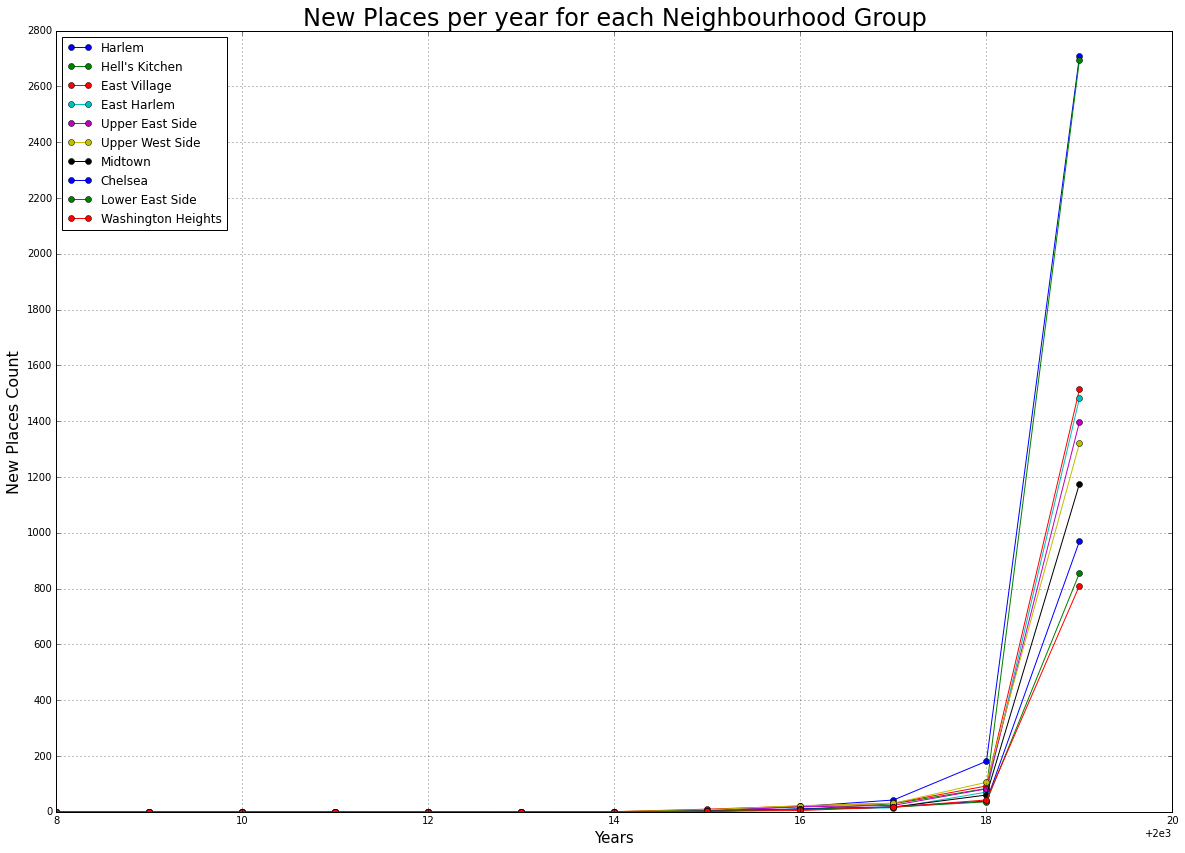

In [136]:
plt.rcParams['figure.figsize'] = (20,14)
for group in avg_review_df.sum().sort_values(ascending=False)[:10].index:
  avg_review_df[group].plot(marker='o')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('New Places Count', fontsize = 16)
plt.title('New Places per year for each Neighbourhood Group', fontsize = 24)
plt.locator_params(axis="y", nbins=24)
plt.grid()
plt.legend(loc='upper left')

In [137]:
#Top 20 neighbours in Brooklyn
avg_review_df.sum().sort_values(ascending=False)[:20]

Harlem                 2956.23
Hell's Kitchen         2818.79
East Village           1668.40
East Harlem            1579.06
Upper East Side        1523.66
Upper West Side        1487.27
Midtown                1264.09
Chelsea                1038.89
Lower East Side         919.93
Washington Heights      876.70
Financial District      752.04
West Village            576.15
Chinatown               439.51
Theater District        379.92
Kips Bay                356.55
SoHo                    329.65
Murray Hill             314.26
Gramercy                294.78
Greenwich Village       282.29
Morningside Heights     249.86
dtype: float64

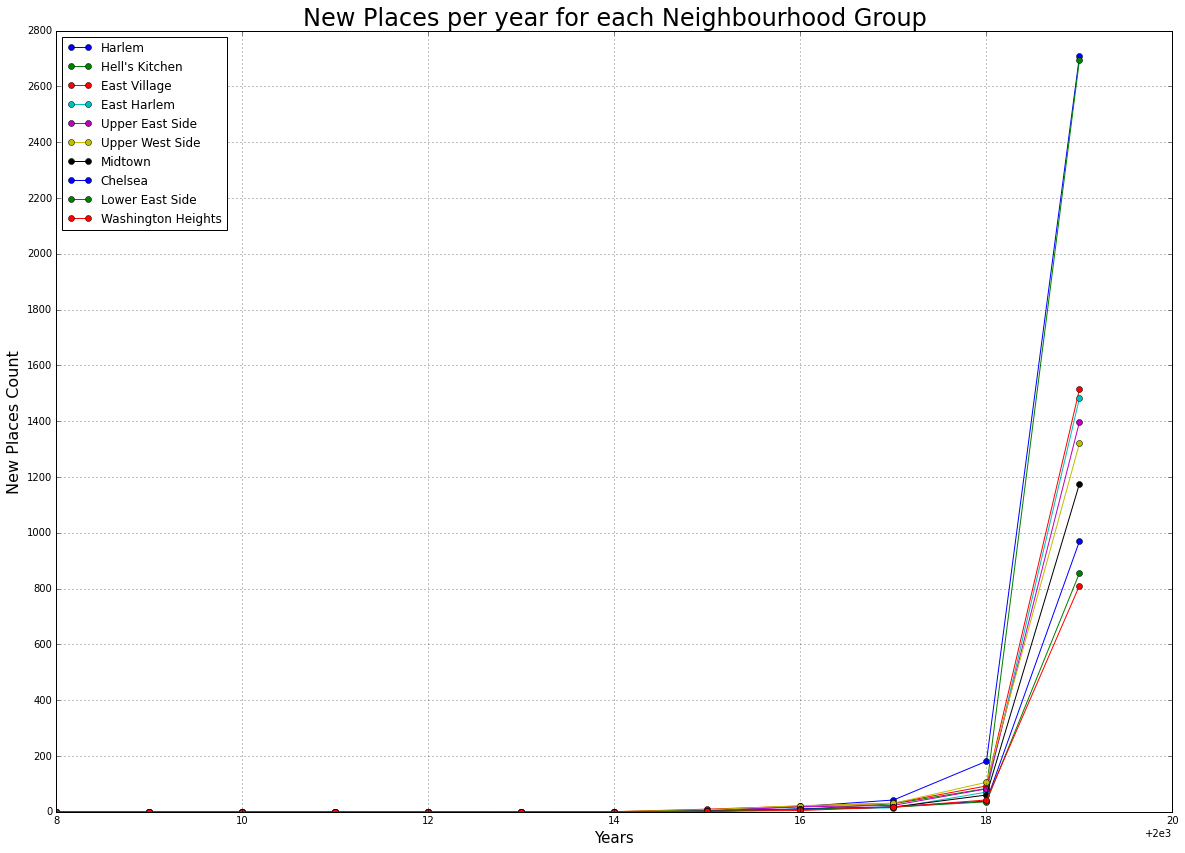

In [139]:
plt.rcParams['figure.figsize'] = (20,14)
for group in avg_review_df.sum().sort_values(ascending=False)[:10].index:
  avg_review_df[group].plot(marker='o')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('New Places Count', fontsize = 16)
plt.title('New Places per year for each Neighbourhood Group', fontsize = 24)
plt.locator_params(axis="y", nbins=24)
plt.grid()
plt.legend(loc='upper left')

In [140]:
# Displaying busiest host with their property counts in neigbourhood

busiest_host_id_list = list(busiest_host['host_id'])
new_df = pd.DataFrame(columns=['host_id','host_name','possible_year_of_start','neighbourhood','Number of Property opened'])
for id in busiest_host_id_list:
  display(temp_df.loc[temp_df.host_id==id,['host_id','host_name','possible_year_of_start','neighbourhood']].value_counts().reset_index().sort_values('possible_year_of_start').rename(columns={0:'Number of Property opened'}))

host_id     host_name  possible_year_of_start       neighbourhood  \
0  219517861  Sonder (NYC)                    2019  Financial District   
1  219517861  Sonder (NYC)                    2019         Murray Hill   
2  219517861  Sonder (NYC)                    2019    Theater District   
3  219517861  Sonder (NYC)                    2019      Hell's Kitchen   
4  219517861  Sonder (NYC)                    2019     Upper East Side   

   Number of Property opened  
0                        170  
1                         28  
2                          5  
3                          3  
4                          1

host_id host_name  possible_year_of_start     neighbourhood  \
0  244361589   Row NYC                    2019  Theater District   

   Number of Property opened  
0                          6

host_id host_name  possible_year_of_start   neighbourhood  \
0  137274917     David                    2018  Hell's Kitchen   
1  137274917     David                    2019  Hell's Kitchen   

   Number of Property opened  
0                          9  
1                          3

host_id host_name  possible_year_of_start   neighbourhood  \
2  224414117   Gabriel                    2017  Hell's Kitchen   
0  224414117   Gabriel                    2018  Hell's Kitchen   
1  224414117   Gabriel                    2019  Hell's Kitchen   

   Number of Property opened  
2                          1  
0                         22  
1                          5

host_id     host_name  possible_year_of_start   neighbourhood  \
0  35524316  Yasu & Akiko                    2015  Hell's Kitchen   

   Number of Property opened  
0                         11

host_id       host_name  possible_year_of_start neighbourhood  \
0  16677326  Alex And Zeena                    2016       Chelsea   
1  16677326  Alex And Zeena                    2018       Chelsea   

   Number of Property opened  
0                         11  
1                          1

host_id host_name  possible_year_of_start   neighbourhood  \
0  253906467      Erik                    2019  Hell's Kitchen   

   Number of Property opened  
0                          9

host_id host_name  possible_year_of_start   neighbourhood  \
0  30985759       Taz                    2018  Hell's Kitchen   

   Number of Property opened  
0                          5

host_id host_name  possible_year_of_start   neighbourhood  \
0  59529529       Han                    2016  Hell's Kitchen   

   Number of Property opened  
0                          6

host_id      host_name  possible_year_of_start neighbourhood  \
0  244559229  Stewart Hotel                    2019       Chelsea   

   Number of Property opened  
0                          8

host_id host_name  possible_year_of_start   neighbourhood  \
0  187975743   R.Henry                    2018  Hell's Kitchen   
1  187975743   R.Henry                    2019  Hell's Kitchen   

   Number of Property opened  
0                          6  
1                          2

host_id host_name  possible_year_of_start   neighbourhood  \
2  190921808      John                    2017  Hell's Kitchen   
0  190921808      John                    2018  Hell's Kitchen   
3  190921808      John                    2018         Chelsea   
1  190921808      John                    2019  Hell's Kitchen   

   Number of Property opened  
2                          4  
0                         33  
3                          1  
1                          8

host_id host_name  possible_year_of_start neighbourhood  \
0  209386156   Abraham                    2018   East Harlem   

   Number of Property opened  
0                          9

host_id host_name  possible_year_of_start       neighbourhood  \
0  159610596    WeWork                    2017  Financial District   
1  159610596    WeWork                    2018  Financial District   
2  159610596    WeWork                    2019  Financial District   

   Number of Property opened  
0                          3  
1                          2  
2                          1

host_id        host_name  possible_year_of_start     neighbourhood  \
0  244370442  Paramount Hotel                    2019  Theater District   

   Number of Property opened  
0                          7

host_id host_name  possible_year_of_start neighbourhood  \
0  251852817      Owen                    2019   East Harlem   

   Number of Property opened  
0                          7

host_id host_name  possible_year_of_start neighbourhood  \
0  231138233     Filiz                    2019   East Harlem   

   Number of Property opened  
0                          5

host_id host_name  possible_year_of_start neighbourhood  \
0  260193759      Nyma                    2019       Midtown   

   Number of Property opened  
0                          4

host_id host_name  possible_year_of_start     neighbourhood  \
0  259087876    Dennis                    2019  Theater District   
1  259087876    Dennis                    2019           Midtown   

   Number of Property opened  
0                          4  
1                          3

host_id host_name  possible_year_of_start neighbourhood  \
1  45835291   Shareef                    2017        Harlem   
0  45835291   Shareef                    2018        Harlem   

   Number of Property opened  
1                          1  
0                          5

In [142]:
#visited properties
temp_df.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:20]

name
Private Bedroom in Manhattan                         666
Room near JFK Queen Bed                              629
Beautiful Bedroom in Manhattan                       617
Great Bedroom in Manhattan                           607
Room Near JFK Twin Beds                              576
Steps away from Laguardia airport                    543
Manhattan Lux Loft.Like.Love.Lots.Look !             540
Cozy Room Family Home LGA Airport NO CLEANING FEE    510
Private brownstone studio Brooklyn                   488
Loft Suite @ The Box House Hotel                     481
LG Private Room/Family Friendly                      480
My Little Guest Room in Flushing                     474
Park Slope Green Guest House                         467
Bright LARGE BED near Manhattan                      466
Only Steps away from LaGuardia arpt                  459
PRIVATE Room on Historic Sugar Hill                  458
Cozy Room                                            455
yahmanscrashpads          

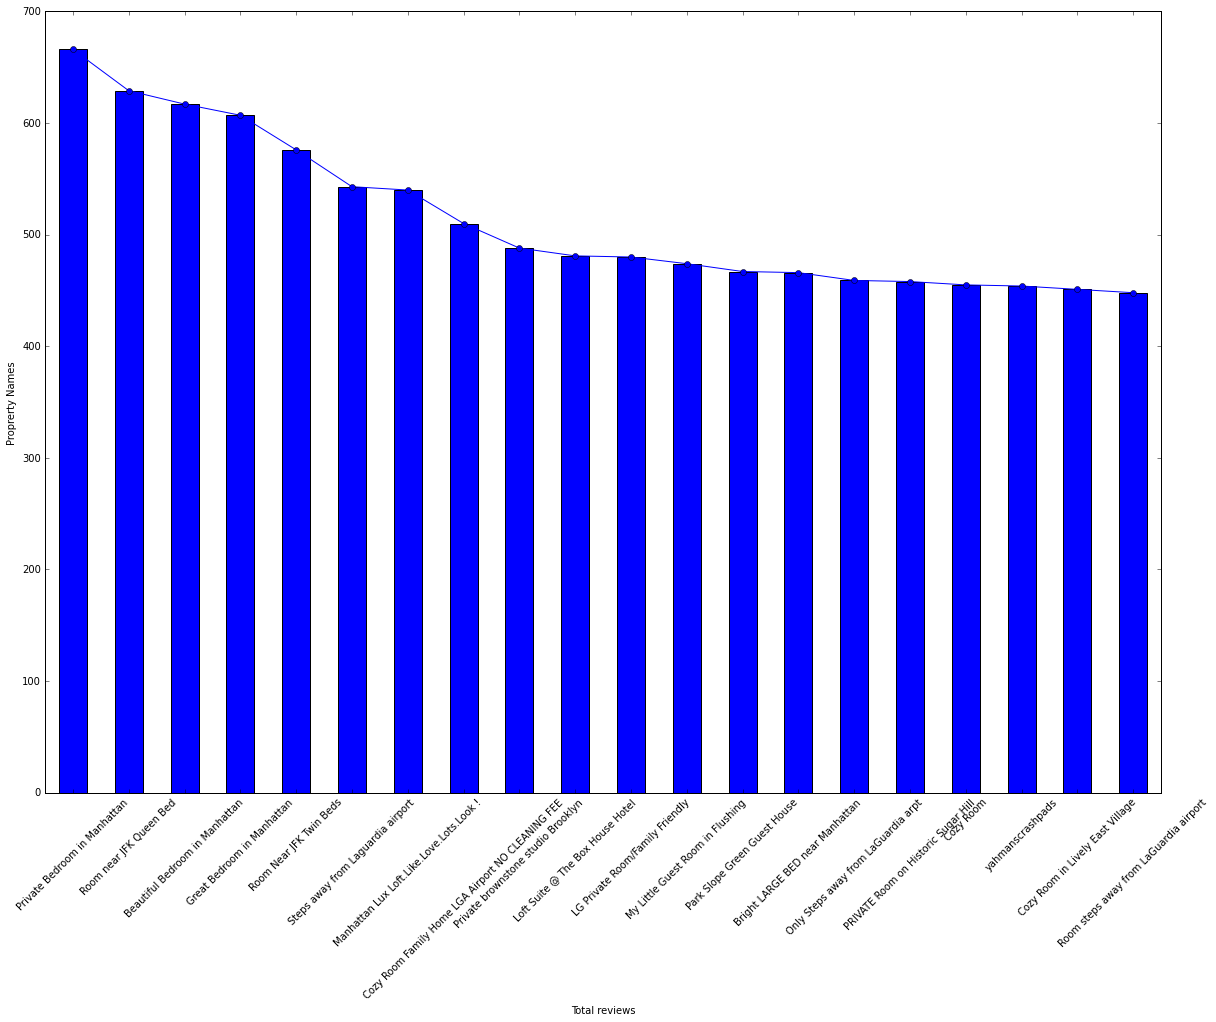

In [146]:
temp_df.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:20].plot(kind='bar')
temp_df.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:20].plot(marker='o')
plt.xlabel('Total reviews')
plt.ylabel('Proprerty Names')
plt.xticks(rotation=45)
plt.show()